## Prediction Using Supervised Machine Learning


We are given a dataset containing the number of hours studied and marks obtained by a student in exam.
We have to use a supervised learning method to create a machine learning model and predict the score that can be obtained if the number of hours studied is given.

### Author : Sreelekshman S

#### Method Used - Simple Linear Regression

We will use LinearRegression class of Scikit-Learn for this problem 

In [2]:
#Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #For plotting the data

First we import the the dataset, which is stored as a csv file.

In [10]:
#Reading the data
data=pd.read_csv("student_score.csv")
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The given data has only one attribute ('Hours') and a label ('Scores'). So we can plot the data as a 2-D graph for an exploratory data analysis

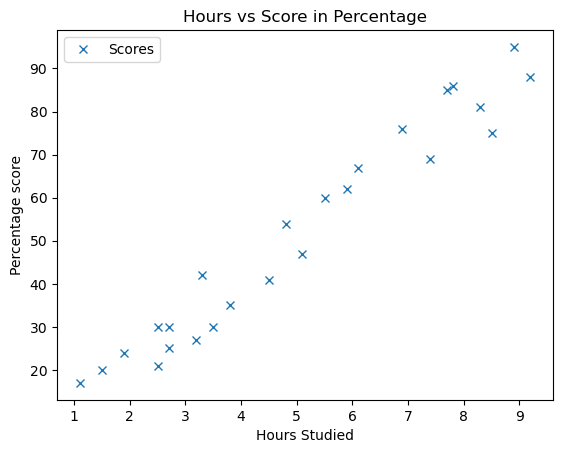

In [32]:
data.plot(x="Hours", y="Scores", style="x")
plt.title("Hours vs Score in Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage score")
plt.show()

From the graph we can see that our decision to use simple linear regression was perfect since the data points are distributed almost linearly.
Our task for today is to predict the score of a student if he studied for 9.25hrs/day.
For predicting the score we need to make a machine learning model.

## Building and Training the Model

We are going to use the LinearRegression model in Scikit-Learn library to build a model with the given data. Before that we have to split the given dataset into test set and training set. We do that because after building the model we need actual data to test whether the model we build is acccurate or not. training set is used for training the model and test set is used for testing the accuracy of model after building.

For splitting the dataset we are using Scikit-Learn's built-in train_test_split() method:

In [64]:
#importing scikit-learn library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Hours']],data[['Scores']], test_size=0.2)
print("Splitting completed")

Splitting completed


## Training the Model

Now that we have split the data into test and training sets, we can fit the data into a LinearRegression model:

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Completed")

Training Completed


Now we can plot the regression line along with our data points to have an idea about how close the model is to actual data.

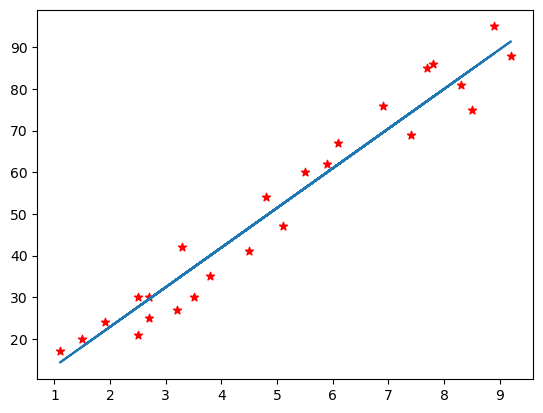

In [66]:
# Plotting the regression line
line = regressor.coef_*(data[["Hours"]])+regressor.intercept_  # y=m*x+c

#Plotting the data
plt.scatter(data[["Hours"]],data[["Scores"]], marker="*", color="red")
plt.plot(data[["Hours"]], line)
plt.show()

### Now we have to evaluate the accuracy of our model

Using the regression model, we will predict the values in y_test based on the x_test values. After that we will display them along with the actual values in y_test.

In [101]:
y_pred = regressor.predict(x_test) # Predicting the scores

# flatten the arrays to make them one-dimensional
y_test = y_test_np.flatten()
y_pred = y_pred.flatten()

# Comparing Actual and Predicted

A = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
A

,Actual,Predicted
0,35,40.027878
1,95,88.564665
2,20,18.138739
3,27,34.317668
4,62,60.013614


Now we are going to calculate the accuracy of our model


In [102]:
score = regressor.score(x_test, y_test)
score

0.9663969197414469

The score value indicates that our model has an accuracy of 96.63% which is pretty good. So we are all set to predict new values using our model.


### That brings us to our main task -  Predict the value of a student who studies for 9.25hrs/day

In [115]:
# Predicting the value of score with hour = 9.25
new_hour = 9.25
value=regressor.predict([[new_hour]])

print("Score Predicted:",value)

Score Predicted: [[91.89562062]]


/home/sreelekshman/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can visualize the new data point along with the other data to get an idea about how well the LinearRegression model worked.

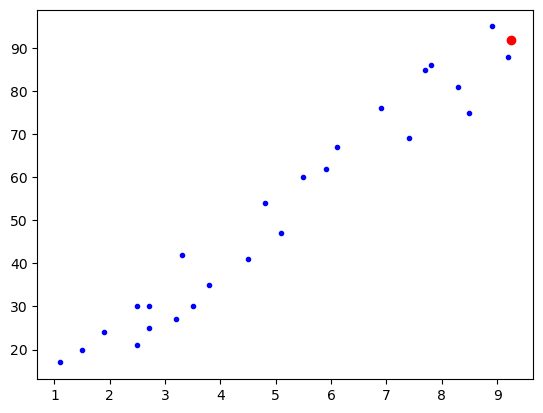

In [117]:
plt.scatter(data[["Hours"]],data[["Scores"]], marker=".", color="blue")
plt.plot(new_hour,value, marker="o", color="red")
plt.show()

#Red dot is the predicted Data Point